# Выбор семейства распределений в наивном байесе

Вам предлагается выяснить, какое распределение лучше использовать в наивном байесовском классификаторе в зависимости от вида признаков.

Загрузите датасеты digits и breast_cancer из sklearn.datasets. Выведите несколько строчек из обучающих выборок и посмотрите на признаки. С помощью sklearn.model_selection.cross_val_score c настройками по умолчанию и вызова метода mean() у возвращаемого этой функцией numpy.ndarray, сравните качество работы наивных байесовских классификаторов на этих двух датасетах. Для сравнения предлагается использовать BernoulliNB, MultinomialNB и GaussianNB. Насколько полученные результаты согласуются с рекомендациями из лекций?

Два датасета, конечно, еще не повод делать далеко идущие выводы, но при желании вы можете продолжить исследование на других выборках (например, из UCI репозитория).

Для сдачи задания, ответьте на приведенные ниже вопросы.

**Вопрос 1**  
Каким получилось максимальное качество классификации на датасете breast_cancer?  
**Вопрос 2**  
Каким получилось максимальное качество классификации на датасете digits?  
**Вопрос 3**  
Выберите верные утверждения и запишите их номера через пробел (в порядке возрастания номера):  
1) На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли  
2) На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным распределением  
3) Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков  
4) На вещественных признаках лучше всего сработало нормальное распределение

### Загрузка библиотек

In [108]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, model_selection, naive_bayes

### Данные digits

In [109]:
digits = datasets.load_digits()
Xd = digits.data
yd = digits.target
Xd[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Данные breast_cancer

In [110]:
cancer = datasets.load_breast_cancer()
Xc = cancer.data
yc = cancer.target
df_c = pd.DataFrame(Xc, columns=cancer.feature_names)
df_c.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [111]:
# словарь для ответов
answers = {'digits': [], 'cancer': []}

### BernoulliNB

In [112]:
bclf = naive_bayes.BernoulliNB()

In [113]:
# For the digits dataset
scores_d = model_selection.cross_val_score(bclf, Xd, yd, scoring='accuracy', cv=3)
scores_d.mean()

0.8258236507780582

In [114]:
# For the cancer dataset
scores_c = model_selection.cross_val_score(bclf, Xc, yc, scoring='accuracy', cv=3)
scores_c.mean()

0.6274204028589994

In [115]:
answers['digits'].append(scores_d.mean())
answers['cancer'].append(scores_c.mean())

### MultinomialNB

In [116]:
mclf = naive_bayes.MultinomialNB()

In [117]:
# For the digits dataset
scores_d = model_selection.cross_val_score(mclf, Xd, yd, scoring='accuracy', cv=3)
scores_d.mean()

0.8708771489735053

In [118]:
# For the cancer dataset
scores_c = model_selection.cross_val_score(mclf, Xc, yc, scoring='accuracy', cv=3)
scores_c.mean()

0.8945790401930752

In [119]:
answers['digits'].append(scores_d.mean())
answers['cancer'].append(scores_c.mean())

### GaussianNB

In [120]:
gclf = naive_bayes.GaussianNB()

In [121]:
# For the digits dataset
scores_d = model_selection.cross_val_score(gclf, Xd, yd, scoring='accuracy', cv=3)
scores_d.mean()

0.8186003803550138

In [122]:
# For the cancer dataset
scores_c = model_selection.cross_val_score(gclf, Xc, yc, scoring='accuracy', cv=3)
scores_c.mean()

0.9367492806089297

In [123]:
answers['digits'].append(scores_d.mean())
answers['cancer'].append(scores_c.mean())

### Визуализация

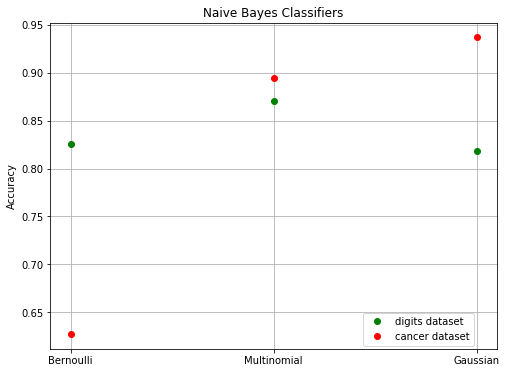

In [124]:
plt.figure(figsize=(8,6))
plt.plot(['Bernoulli', 'Multinomial', 'Gaussian'], answers['digits'], 
         'go', label='digits dataset')
plt.plot(['Bernoulli', 'Multinomial', 'Gaussian'], answers['cancer'],
         'ro', label='cancer dataset')
plt.title('Naive Bayes Classifiers')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc=(.7,0.01))
plt.show()

### Ответы

In [125]:
def write_answer(i, answer):
    name = 'assign1_problem{0}.txt'.format(i)
    with open(name, 'w') as fout:
        fout.write(str(answer))

In [126]:
# ответ 1
write_answer(1, max(answers['cancer']))

# ответ 2
write_answer(2, max(answers['digits']))

# ответ 3
write_answer(3, '3 4')